In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

import os
for dirname,_,filenames in os.walk('C:\\Users\\JAMIN\\OneDrive\\Desktop\\data_sets\\Amazon data.zip'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
    


In [2]:
#creating a variable to store the data from the file path
amazon_file = 'C:\\Users\\JAMIN\\OneDrive\\Desktop\\data_sets\\Amazon data.zip'

#reading from the file
amazon_data = pd.read_csv(amazon_file)

#printing the first 5 rows of the data
amazon_data.head()

,date,open,high,low,close,adj_close,volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [3]:
#looking a the summary of the statistical destribution of the data
amazon_data.describe()

,open,high,low,close,adj_close,volume
count,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6.986000e+03
mean,40.666560,41.139546,40.153303,40.659883,40.659883,1.360668e+08
std,58.107283,58.751435,57.401423,58.091213,58.091213,1.375800e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2.100125,2.148125,2.064125,2.109750,2.109750,6.300350e+07
50%,9.033250,9.158500,8.921750,9.017000,9.017000,1.005360e+08
75%,72.673750,73.596622,71.368876,72.900251,72.900251,1.555295e+08
max,239.020004,242.520004,238.029999,242.059998,242.059998,2.086584e+09


In [4]:
#looking at the data info
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6986 non-null   object 
 1   open       6986 non-null   float64
 2   high       6986 non-null   float64
 3   low        6986 non-null   float64
 4   close      6986 non-null   float64
 5   adj_close  6986 non-null   float64
 6   volume     6986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.2+ KB


In [5]:
#looking at thre shape of the data
amazon_data.shape

(6986, 7)

In [6]:
amazon_data.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

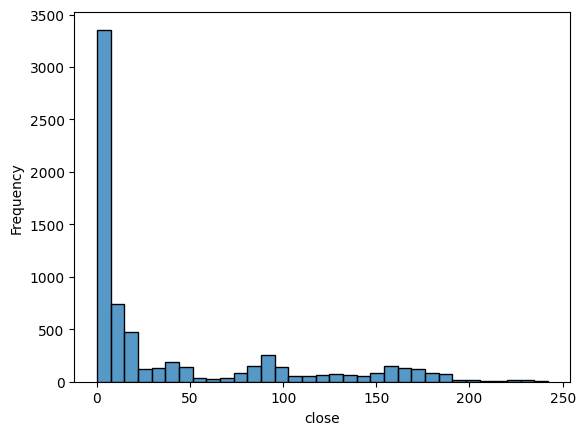

In [7]:
#visualizing at the distribution of the closing price using a histo gram
sns.histplot(data = amazon_data,x = 'close')
plt.ylabel('Frequency')
plt.show()

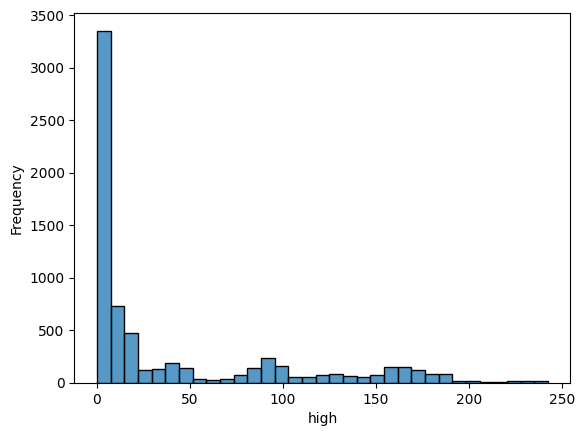

In [8]:
#visualizing at the distribution of the closing price using a histo gram
sns.histplot(data = amazon_data,x = 'high')
plt.ylabel('Frequency')
plt.show()


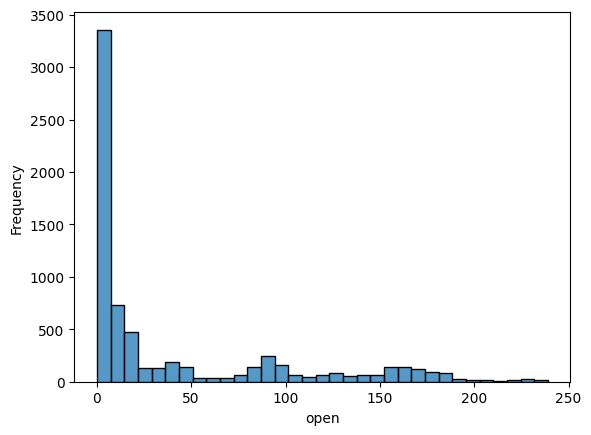

In [9]:
#visualizing at the distribution of the closing price using a histo gram
sns.histplot(data = amazon_data,x = 'open')
plt.ylabel('Frequency')
plt.show()

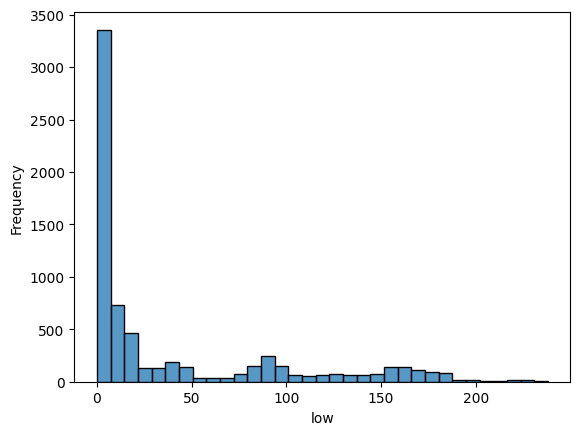

In [10]:
#visualizing at the distribution of the closing price using a histo gram
sns.histplot(data = amazon_data,x = 'low')
plt.ylabel('Frequency')
plt.show()


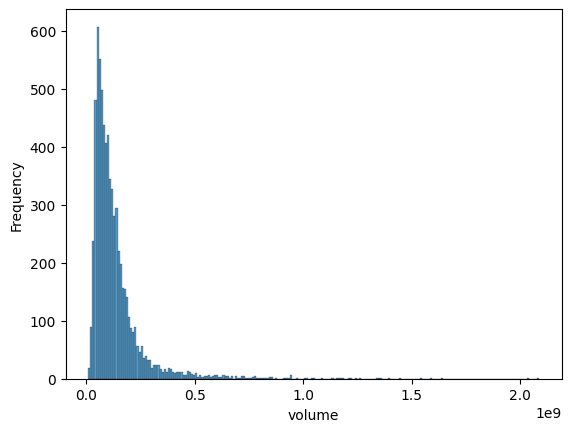

In [11]:
#visualizing at the distribution of the closing price using a histo gram
sns.histplot(data = amazon_data,x = 'volume')
plt.ylabel('Frequency')
plt.show()
			


In [12]:
amazon_data['date']=amazon_data['date'].apply(lambda x:x.split(' ')[0])
amazon_data['date']=pd.to_datetime(amazon_data['date'])
amazon_data['day']=amazon_data['date'].dt.day
amazon_data['month']=amazon_data['date'].dt.month
amazon_data['year']=amazon_data['date'].dt.year

In [13]:
amazon_data.drop('date' ,axis = 1)

,open,high,low,close,adj_close,volume,day,month,year
0,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,15,5,1997
1,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,16,5,1997
2,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,19,5,1997
3,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,20,5,1997
4,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,21,5,1997
...,...,...,...,...,...,...,...,...,...
6981,228.850006,230.419998,227.520004,230.369995,230.369995,31346500,13,2,2025
6982,229.199997,229.889999,227.229996,228.679993,228.679993,27031100,14,2,2025
6983,228.820007,229.300003,223.720001,226.649994,226.649994,42975100,18,2,2025
6984,225.520004,226.830002,223.710007,226.630005,226.630005,28566700,19,2,2025


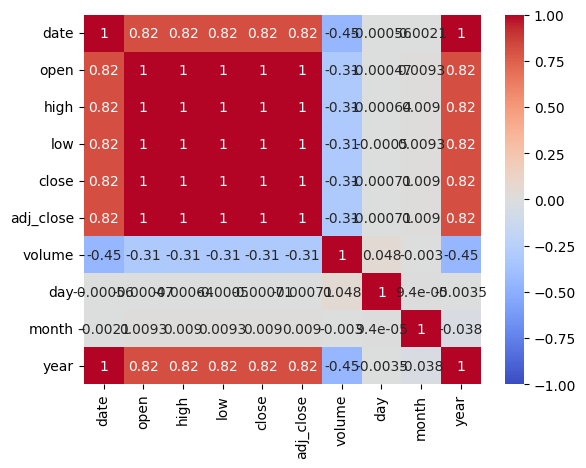

In [14]:
#creating a corrilation heatmap
corr_matrix = amazon_data.corr()
sns.heatmap(
    corr_matrix,
    annot = True,
    cmap = 'coolwarm',
    vmin=-1, vmax=1
)
plt.show()

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [16]:
features = ['open', 'high', 'low', 'volume']
target = 'adj_close'

X = amazon_data[features]
y = amazon_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100)
}

In [23]:
for name, model in models.items():
    model.fit(X_train_scaled if name == "Linear Regression" else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name == "Linear Regression" else X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - mean_squared_error: {mse:.2f}, R2 Score: {r2:.2f}")

Linear Regression - mean_squared_error: 0.25, R2 Score: 1.00
Decision Tree Regressor - mean_squared_error: 0.63, R2 Score: 1.00
Random Forest Regressor - mean_squared_error: 0.44, R2 Score: 1.00
